In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [81]:
data = pd.read_csv('/content/Auction_master_train.csv')

In [82]:
data.shape

(1933, 41)

#### Column 확인

Auction_key: 경매 아파트 고유키 값

Auction_class: 경매 구분 - 강제경매 / 임의 경매

Bid_class: 입찰구분 - 일반/개별/일괄

Claim_price: 경매 신청인의 청구 금액

Appraisal_company: 감정사

Appraisal_date: 감정일자

Auction_count: 총 경매횟수

Auction_miscarriage_count: 총 유찰횟수

Total_land_gross_area: 총 토지 전체면적 ($m^2$)

Total_land_real_area: 총 토지 실면적 ($m^2$)

Total_land_auction_area: 총 토지 경매 면적 ($m^2$)

Total_building_area: 총 건물 면적 ($m^2$)

Total_building_auction_area: 총 건물 경매 면적 ($m^2$)

Total_appraisal_price: 총 감정가

Minimum_sales_price: 최저 매각 가격 (입찰 시 최저로 제시해야 하는 금액)

First_auction_date: 최초 경매일

Final_auction_date: 최종 경매일

Final_result: 최종결과

Creditor: 채권자, 경매 신청인

addr_do: 주소 - 시도

addr_si: 주소 - 시군구

addr_dong: 주소 - 읍면동

addr_li: 주소 - 리

addr_san : 주소 - 산번지 여부

addr_bunji1: 주소 - 번지1

addr_bunji2: 주소 - 번지2

addr_etc: 주소 - 기타주소

Apartment_usage: 건물(토지)의 대표 용도

Completion_date: 준공일

Preserve_regist_date: 보존등기일 (건물을 신축하고 처음으로 등기한 날짜)

Total_floor: 총 층 수

Current_floor: 현재 층 수

Specific: 기타 특이사항

Share_auction_YorN: 지분경매 여부 (하나의 부동산이 전체가 아닌 일부만 경매 진행)

road_name: 도로명주소 - 도로명

road_bunji1: 도로명주소 - 번지1

road_bunji2: 도로명주소 - 번지2

Close-date: 종국일자

Close_result: 종국 결과, 낙찰과 배당의 차이

point.y: 위도

point.x 경도

Hammer_price: 낙찰가

#### 기본적인 통계학적 정보


In [83]:
data.describe(include='all')

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
count,1933.000000,1933,1933,1.933000e+03,1933,1933,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1933,1933,1933,1933,1933,1933,1933,23,1933,1929.000000,889.000000,1933,1933,1933,1933.000000,1933.000000,64,1933,1933,1909.000000,155.000000,1933,1933,1933.000000,1933.000000,1.933000e+03
unique,NaN,2,3,NaN,238,712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498,405,1,448,2,39,285,9,2,NaN,NaN,1929,2,1256,NaN,NaN,55,2,1038,NaN,NaN,389,2,NaN,NaN,NaN
top,NaN,임의,일반,NaN,자연감정,2015-08-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-26 00:00:00,2016-04-26 00:00:00,낙찰,Private,서울,노원구,상계동,모전리,N,NaN,NaN,1층 101호,아파트,1111-11-11 00:00:00,NaN,NaN,"**1차감정: 220,000,000",N,마포대로,NaN,NaN,2016-09-08 00:00:00,배당,NaN,NaN,NaN
freq,NaN,1439,1796,NaN,33,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,19,1933,483,1242,129,52,10,1912,NaN,NaN,3,1656,43,NaN,NaN,5,1854,33,NaN,NaN,37,1921,NaN,NaN,NaN
mean,1380.271081,NaN,NaN,3.703908e+08,NaN,NaN,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,601.952307,22.742407,NaN,NaN,NaN,16.980859,8.817900,NaN,NaN,NaN,127.441069,12.748387,NaN,NaN,36.698018,127.731667,4.726901e+08
std,801.670470,NaN,NaN,1.337869e+09,NaN,NaN,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554.119824,67.000807,NaN,NaN,NaN,9.509021,8.044644,NaN,NaN,NaN,188.394217,10.735663,NaN,NaN,1.150269,0.993055,5.574493e+08
min,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,35.051385,126.809393,6.303000e+06
25%,691.000000,NaN,NaN,7.746112e+07,NaN,NaN,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.000000,1.000000,NaN,NaN,NaN,12.000000,3.000000,NaN,NaN,NaN,24.000000,5.000000,NaN,NaN,35.188590,126.959167,1.975550e+08
50%,1395.000000,NaN,NaN,1.728143e+08,NaN,NaN,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,482.000000,5.000000,NaN,NaN,NaN,15.000000,7.000000,NaN,NaN,NaN,57.000000,9.000000,NaN,NaN,37.500862,127.065003,3.544500e+08
75%,2062.000000,NaN,NaN,3.565089e+08,NaN,NaN,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,834.000000,18.000000,NaN,NaN,NaN,21.000000,12.000000,NaN,NaN,NaN,145.000000,17.500000,NaN,NaN,37.566116,129.018054,5.599000e+08


## 1. 시간과 관련된 변수에 의한 시계열적 Trend 확인





##### 1) Appraisal_date

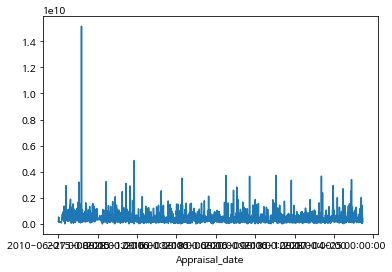

In [84]:
data_date= data[['Appraisal_date','Hammer_price']]
data_date_sort=data_date.sort_values(by=['Appraisal_date'],axis=0)
new_date_data = data_date_sort.set_index('Appraisal_date')
new_date_data['Hammer_price'].plot()

**Appraisal_date에 따른 시계열적 trend는 확인할 수 없었음**

##### 2) First_auction_date

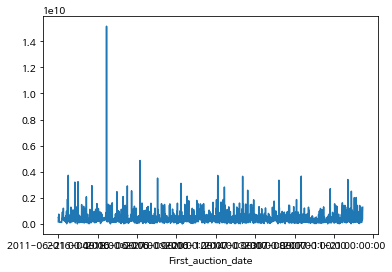

In [85]:
data_date= data[['First_auction_date','Hammer_price']]
data_date_sort=data_date.sort_values(by=['First_auction_date'],axis=0)
new_date_data = data_date_sort.set_index('First_auction_date')
new_date_data['Hammer_price'].plot()

**First_auction_date에 따른 시계열적 trend는 확인할 수 없었음**

##### 3)Final_auction_date

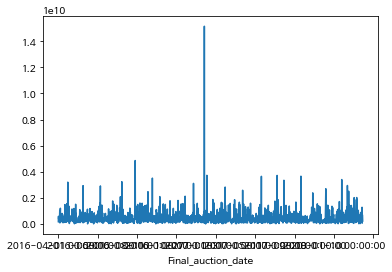

In [86]:
data_date= data[['Final_auction_date','Hammer_price']]
data_date_sort=data_date.sort_values(by=['Final_auction_date'],axis=0)
new_date_data = data_date_sort.set_index('Final_auction_date')
new_date_data['Hammer_price'].plot()

**Final_auction_date에 따른 시계열적 trend는 확인할 수 없었음**

##### 4)Preserve_regist_date

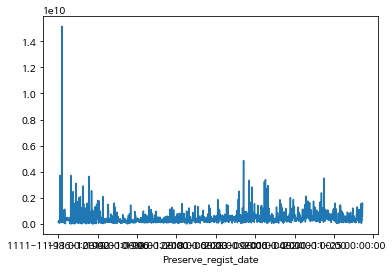

In [87]:
data_date= data[['Preserve_regist_date','Hammer_price']]
data_date_sort=data_date.sort_values(by=['Preserve_regist_date'],axis=0)
new_date_data = data_date_sort.set_index('Preserve_regist_date')
new_date_data['Hammer_price'].plot()

**Preserve_regist_date에 따른 시계열적 trend는 확인할 수 없었음**

##### 5) Close_date

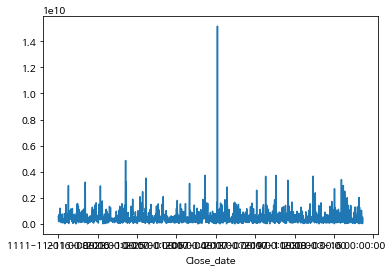

In [88]:
data_date= data[['Close_date','Hammer_price']]
data_date_sort=data_date.sort_values(by=['Close_date'],axis=0)
new_date_data = data_date_sort.set_index('Close_date')
new_date_data['Hammer_price'].plot()

**Close_date에 따른 시계열적 trend는 확인할 수 없었음**

## 2. Categorical 변수들의 Category에 따른 Y값의 차이 확인


##### 1) Auction_class

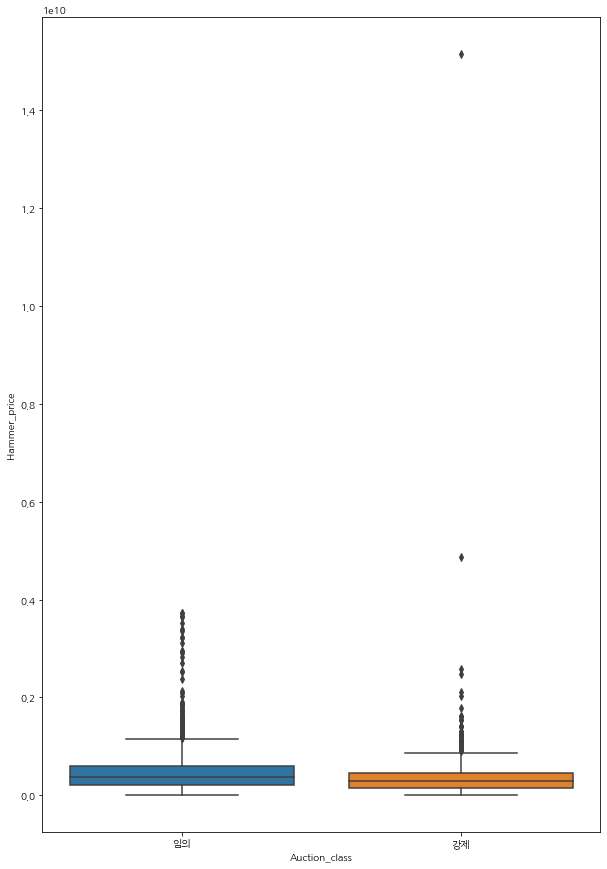

In [89]:
plt.rc('font', family='NanumGothic') 
figure, ax1 = plt.subplots(figsize=(10,15))

sns.boxplot(x='Auction_class',y="Hammer_price", data = data )

**Auction_class의 카테고리에 따른 Y의 차이는 거의 없음**

##### 2) Appraisal_company

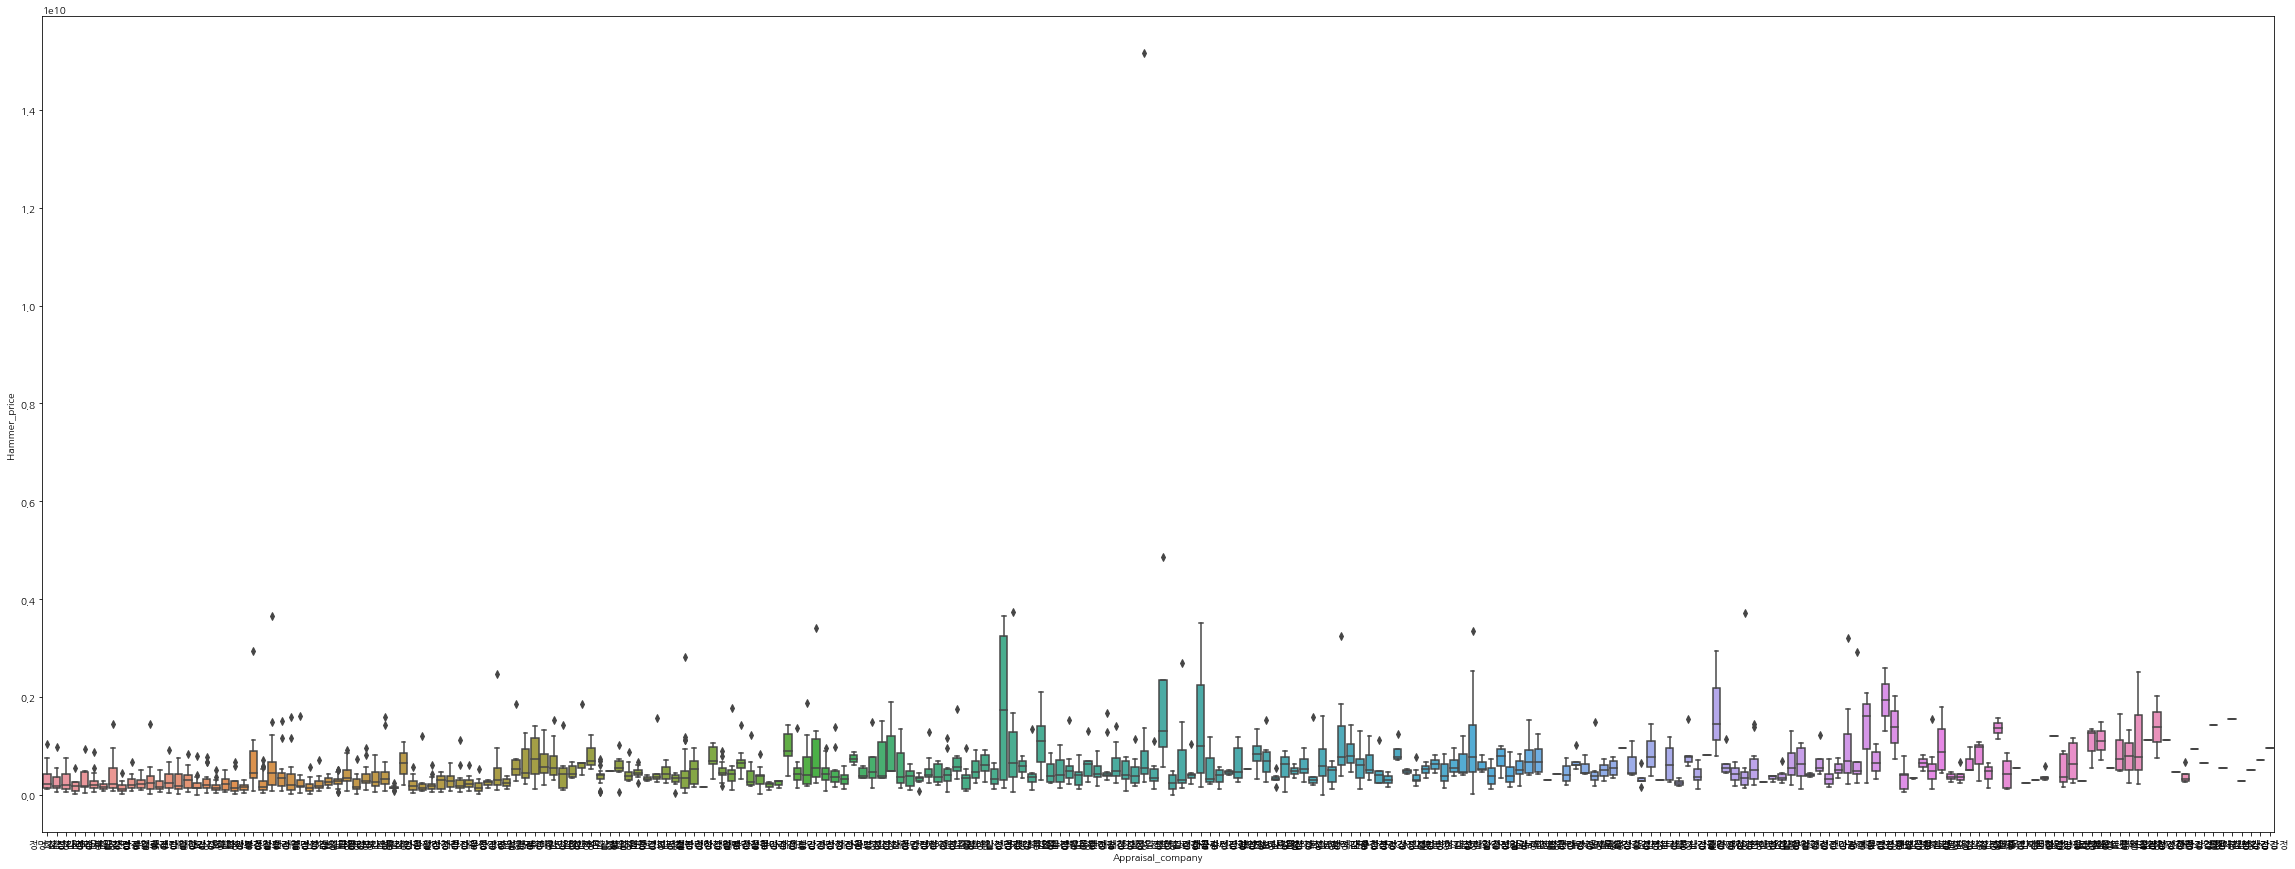

In [90]:
figure, ax1 = plt.subplots(figsize=(40,15))


sns.boxplot(x='Appraisal_company',y="Hammer_price", data = data )

**감정사가 엄청 많다. 은근 차이는 있어보이는게 있는데 clustering해볼 만 하다 생각함 (구 묶는거랑 비슷....)**

##### 3) Share_auction_YorN

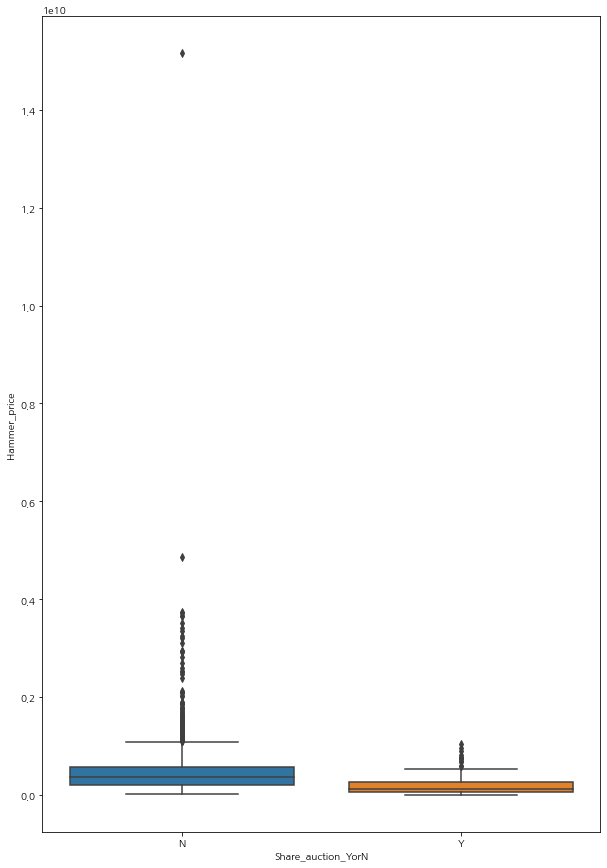

In [91]:
figure, ax1 = plt.subplots(figsize=(10,15))


sns.boxplot(x='Share_auction_YorN',y="Hammer_price", data = data )

**Share_auction_YorN의 카테고리에 따른 Y의 차이가 커보이진 않는다**

##### 4) Close_result



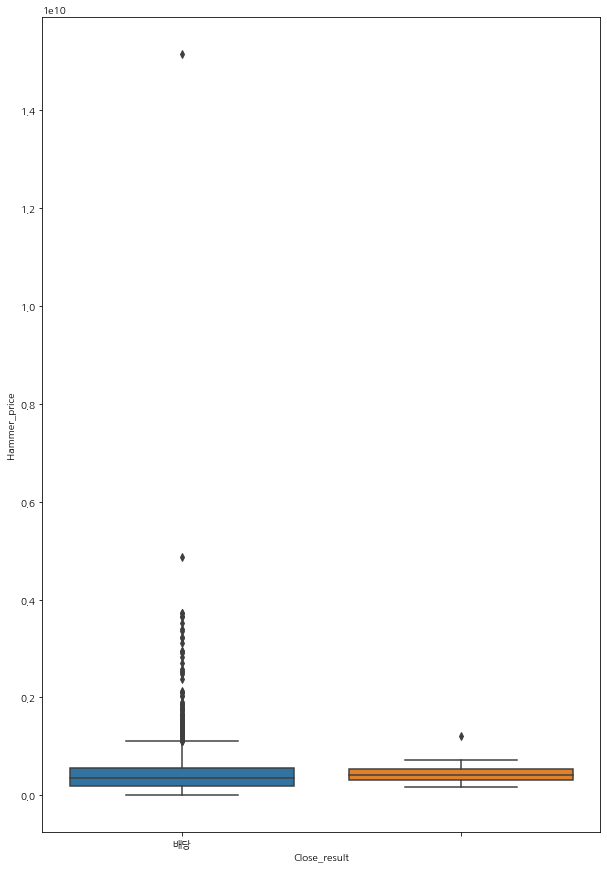

In [92]:
figure, ax1 = plt.subplots(figsize=(10,15))


sns.boxplot(x='Close_result',y="Hammer_price", data = data )

**Close_result의 카테고리에 따른 Y의 차이가 커보이진 않는다**

##### 5) addr_do

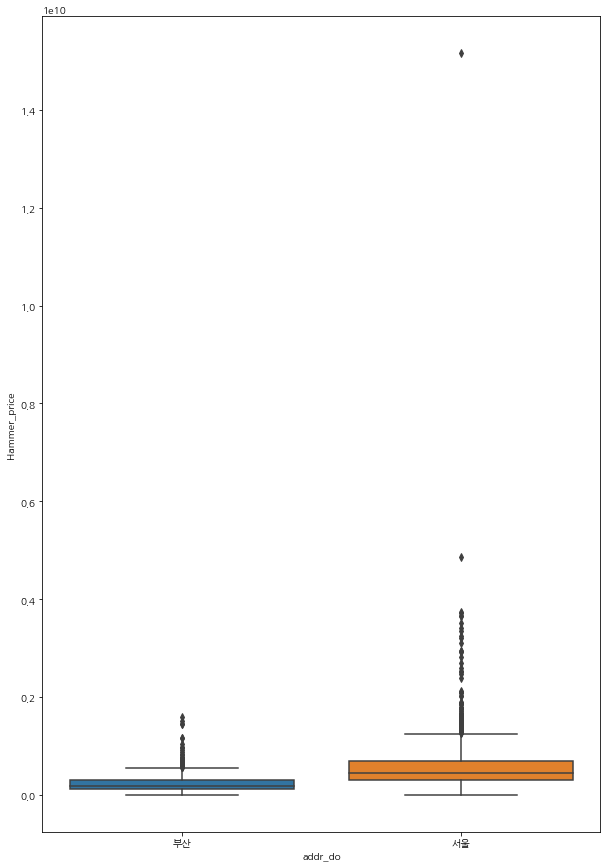

In [93]:
figure, ax1 = plt.subplots(figsize=(10,15))


sns.boxplot(x='addr_do',y="Hammer_price", data = data )

**서울 부산 여부에 따른 Y의 차이가 어느 정도 존재**

##### 6) Apartment_usage

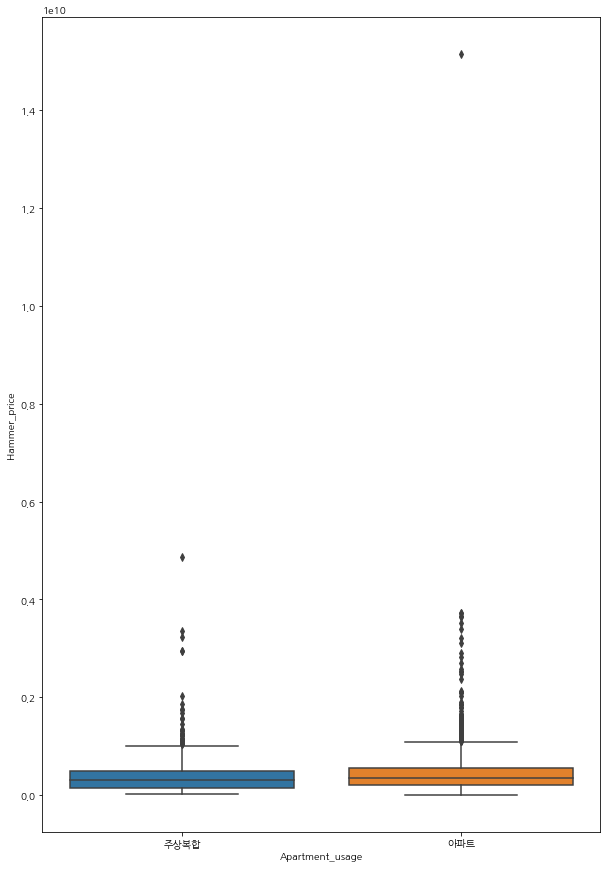

In [94]:
figure, ax1 = plt.subplots(figsize=(10,15))


sns.boxplot(x='Apartment_usage',y="Hammer_price", data = data )

**Apartment_usage의 category에 따른 Y의 차이가 없어보임**

## 3. 층 수에 대한 고민

전체 층 수에서 해당 주택이 몇 층에 있는지 확인하는 변수를 생성

In [95]:
data['floor_importance'] = data['Current_floor'] / data['Total_floor']

In [96]:
data.corr()['Hammer_price']

Auction_key                   -0.418769
Claim_price                    0.267728
Auction_count                 -0.016999
Auction_miscarriage_count     -0.011296
Total_land_gross_area          0.070466
Total_land_real_area           0.696099
Total_land_auction_area        0.700639
Total_building_area            0.768454
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
addr_bunji1                   -0.003139
addr_bunji2                   -0.003641
Total_floor                    0.220830
Current_floor                  0.198013
road_bunji1                    0.020404
road_bunji2                    0.206681
point.y                        0.295698
point.x                       -0.296312
Hammer_price                   1.000000
floor_importance               0.008581
Name: Hammer_price, dtype: float64

**그러나 correlation이 높지 않음을 확인할 수 있다.**

## 4. 변수 간의 Correlation 확인



##### 1)결측치 확인

In [97]:
data.isna().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

결측치가 대부분인 **addr_li / addr_bunji2 / Specific / road_bunji2** 을 drop한다.

In [98]:
data_1 = data.drop(['addr_li', 'addr_bunji2', 'Specific', 'road_bunji2'],axis='columns')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


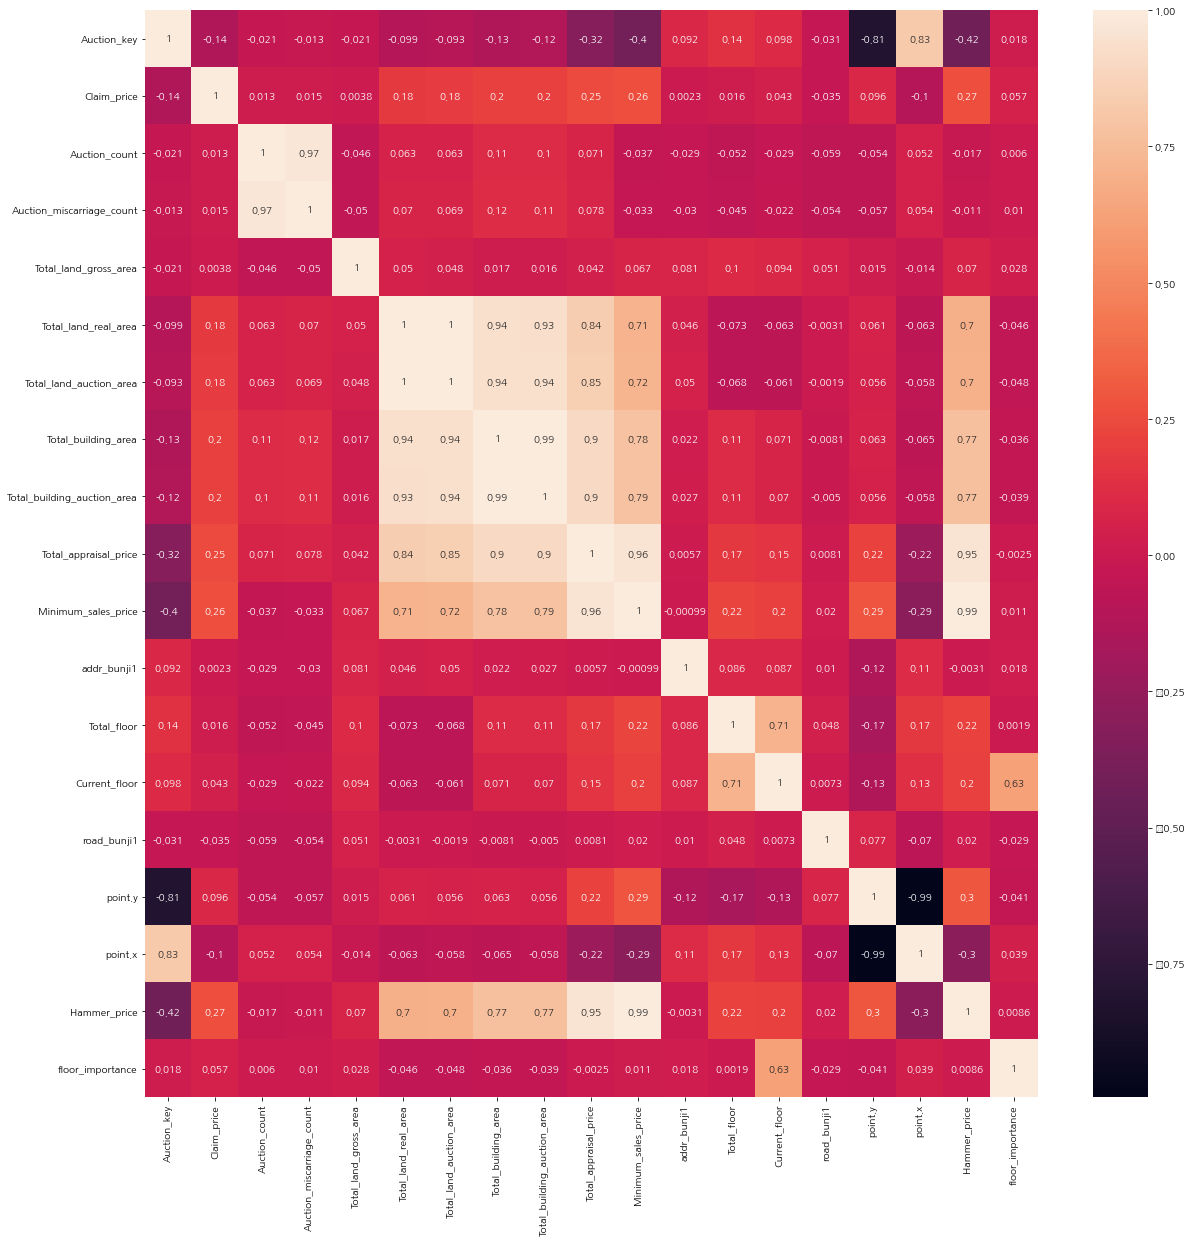

In [99]:
plt.figure(figsize=(20,20))

sns.heatmap(data_1.iloc[:,:].corr(),annot=True, annot_kws ={'size' :10} )

**Auction_count와 Auction_carriage_count는 서로 상관도가 매우 높기에 하나만 사용해도 될 것 같다**

**위에서 Y와의 correlation이 높으면서 서로의 correlation도 높은 6개의 변수를 선택하여 따로 뽑아내었다**.

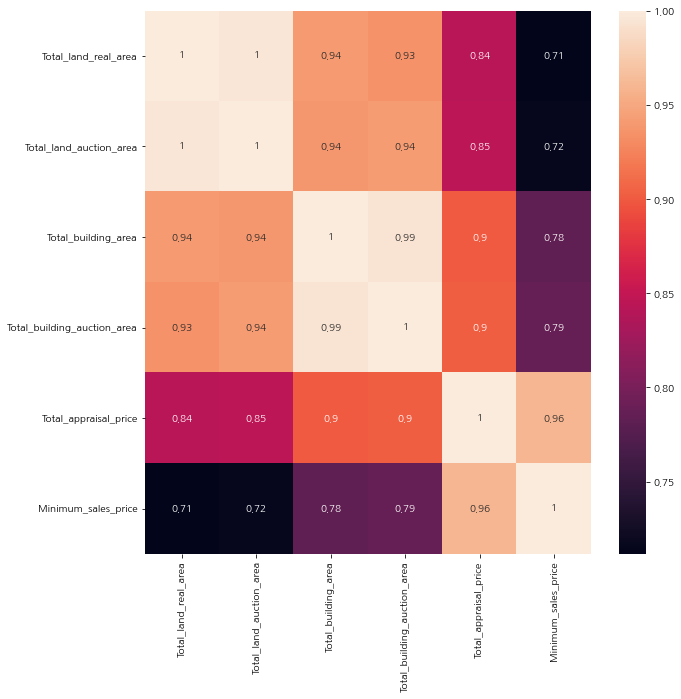

In [100]:
plt.figure(figsize=(10,10))

sns.heatmap(data_1.iloc[:,9:16].corr(),annot=True)

**여기서 total_land_real_area 와 Total_land_auction_area는 서로 상관계수가 1이므로 하나를 임의로 제거하였다**

In [101]:
data_2 = data_1.drop(['Total_land_real_area'],axis='columns')

**여전히 5개의 변수는 서로 상관계수가 높기에 이를 FA를 통해 줄이는 과정을 진행하였다.**

FA 이전에 factor의 갯수를 pca를 기반으로 정하기에 PCA를 먼저 진행

In [102]:
from sklearn.preprocessing import StandardScaler

data_4pca = data_2.iloc[:,9:14]

##표준화
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data_4pca), columns=data_4pca.columns, index = data_4pca.index)



In [103]:
data_scaled.cov() ##데이터의 공분산행렬

,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price
Total_land_auction_area,1.000518,0.938630,0.942169,0.845680,0.716261
Total_building_area,0.938630,1.000518,0.994048,0.900768,0.783704
Total_building_auction_area,0.942169,0.994048,1.000518,0.902455,0.787774
Total_appraisal_price,0.845680,0.900768,0.902455,1.000518,0.960854
Minimum_sales_price,0.716261,0.783704,0.787774,0.960854,1.000518


In [104]:
data_scaled.corr() ##데이터의 상관도행렬

,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price
Total_land_auction_area,1.000000,0.938144,0.941681,0.845243,0.715891
Total_building_area,0.938144,1.000000,0.993533,0.900302,0.783299
Total_building_auction_area,0.941681,0.993533,1.000000,0.901988,0.787366
Total_appraisal_price,0.845243,0.900302,0.901988,1.000000,0.960357
Minimum_sales_price,0.715891,0.783299,0.787366,0.960357,1.000000


In [105]:
#PCA 진행
!pip install factor_analyzer
from sklearn.decomposition import PCA
pca = PCA(random_state=2016147006)
X_p = pca.fit_transform(data_scaled)

#Eigenvalue 구하기
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=data_scaled.shape[1], rotation= None)
fa.fit(data_scaled)

ev, v = fa.get_eigenvalues()
ev

array([4.5120747 , 0.39688996, 0.07155905, 0.01320159, 0.00627471])

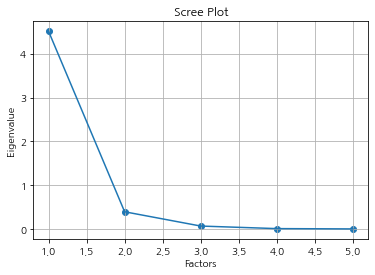

In [106]:
##PC의 Scree Plot 그리기

plt.scatter(range(1, data_scaled.shape[1]+1),ev)
plt.plot(range(1,data_scaled.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

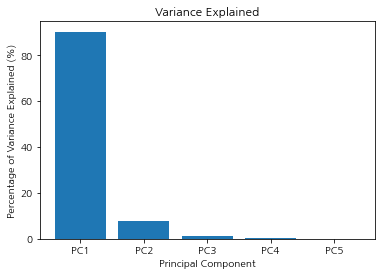

In [107]:
# 분산 설명 비율을 활용한 plot 그리기
import numpy as np
each_variance_ratio = pca.explained_variance_ratio_

# 누적 분산 설명 비율

cumsum = np.cumsum(pca.explained_variance_ratio_)

pd.Series(np.cumsum(pca.explained_variance_ratio_)) #고유값을 기준으로 설명 가능한 분산 (누적)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

**Scree Plot과 Variance Explained plot을 이용해 2개의 주성분을 활용하기로 결정하였다.**

In [108]:
pd.DataFrame(pca.components_[:,:2], 
             columns = ['PC1','PC2'], 
             index=data_scaled.columns)

,PC1,PC2
Total_land_auction_area,0.440983,0.458340
Total_building_area,0.448332,0.290664
Total_building_auction_area,0.772310,-0.465766
Total_appraisal_price,-0.082153,-0.023195
Minimum_sales_price,0.036328,0.698544


**각 주성분에서의 Loading을 확인할 수 있다**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


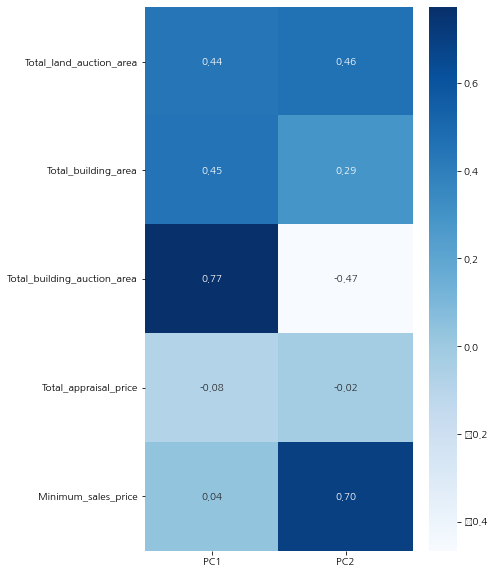

In [109]:
pca_result = pd.DataFrame(pca.components_[:,:2], 
             columns = ['PC1','PC2'], 
             index=data_scaled.columns)
plt.figure(figsize=(6,10))
sns.heatmap(pca_result, cmap="Blues", annot=True, fmt='.2f') #소수 둘째자리까지

**heatmap으로는 위와같이 나타낼 수 있다.**

**이제 위의 결과를 이용해 2개의 Factor를 사용하는 FA를 진행**

그에 앞서 FA를 진행해도 되는 data set인지 검증하기 위해 bartlett test와 kmo 테스트를 진행

In [110]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(22103.976591899278, 0.0)

In [111]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model =calculate_kmo(data_scaled)
kmo_model # 0.8 이상이므로 꽤 좋음

0.7961203929810253

**모두 통과하여 FA를 진행해도 된다**

In [112]:
fa = FactorAnalyzer(n_factors=2, rotation = "varimax")
fa.fit(data_scaled)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

**Varimax를 이용하여 Factor 2개를 얻어냄**

In [113]:
fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2'],
                                 index=data_scaled.columns)
fa_result_loading

,Factor1,Factor2
Total_land_auction_area,0.847332,0.418050
Total_building_area,0.873027,0.476123
Total_building_auction_area,0.875420,0.478382
Total_appraisal_price,0.603378,0.787810
Minimum_sales_price,0.397485,0.914265


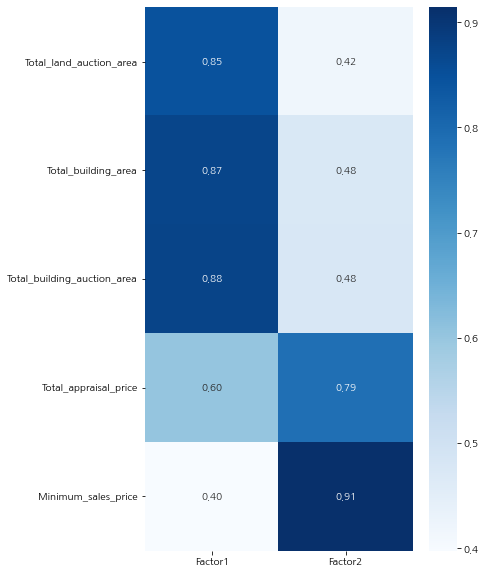

In [114]:
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

**Factor의 Loading을 heatmap으로 확인할 수 있다**

In [115]:
##Factor를 통해 설명되는 분산을 확인

fa.get_factor_variance()
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2
SS Loadings,2.768566,2.086833
Proportion Var,0.553713,0.417367
Cumulative Var,0.553713,0.971080


**위의 결과를 통해 2개의 Factor를 다음과 같이 정의하였다.**

**Factor 1 : 면적에 관련된 Factor**

**Factor 2 : 가격에 관련된 Factor**

In [116]:
X_f = fa.fit_transform(data_scaled)
X_ff = pd.DataFrame(X_f[:,:2], 
                    columns = ['Area','Price'], 
                    index = data_scaled.index)
X_ff

,Area,Price
0,0.776758,0.148704
1,-0.329771,1.098879
2,-0.074285,-0.657482
3,0.151135,-0.463668
4,0.290147,-0.729535
...,...,...
1928,-0.128084,0.009742
1929,0.348135,-0.280659
1930,-0.374050,1.479401
1931,0.012299,-0.190510


**2개의 Factor를 Area와 Price로 명명하고 loading에 맞추어 data값을 계산하였다**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


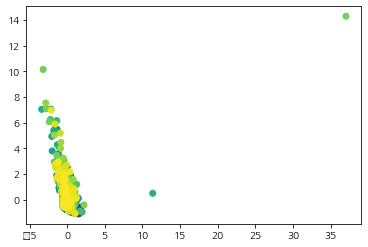

In [117]:
# Score Plot 1
plt.scatter(x=X_ff['Area'],y=X_ff['Price'], c=X_ff.index)

**score plot이 매우 선형적인 형태를 띠고 있음을 볼 수 있다**

## 5. 2개의 Factor를 활용한 선형회귀

In [118]:
##2개의 factor와 Y로 이루어진 DF 만듦
new_data = pd.concat([X_ff, data_1['Hammer_price']],axis=1)

In [119]:
from statsmodels.formula.api import ols
res = ols('Hammer_price~Area+Price',data= new_data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Hammer_price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 8.938e+04
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        13:46:49   Log-Likelihood:                -37284.
No. Observations:                1933   AIC:                         7.457e+04
Df Residuals:                    1930   BIC:                         7.459e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.727e+08   1.31e+06    360.530      0.000     4.7e+08    4.75e+08
Area        2.103e+08   1.32e+06    159.811      0.000    2.08e+08    2.13e+08
Price       5.145e+08   1.32e+06    390.379      0.000    5.12e+08    5.17e+08
==============================================================================
Omnibus:                     1290.220   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49456.218
Skew:                           2.598   Prob(JB):                         0.00
Kurtosis:                      27.229   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-square와 Adj. R-square 등 매우 좋은 적합도를 보여준다**

### **위의 과정을 통해 최종적으로 모델에 사용할 변수들을 골라내었다**

(아직까진 계획을 모아놓은 것... 나중에 다른 분들 ipynb와 합쳐서 최종 정리를 하면 좋지 않을까 싶습니다!)


**Auction_count: 총 경매횟수** -> Y에 크게 영향력은 없음

----------------------------------------------



**Total_land_gross_area: 총 토지 전체면적 ($m^2$)**

**Total_land_real_area: 총 토지 실면적 ($m^2$)**

**Total_land_auction_area: 총 토지 경매 면적 ($m^2$)**

**Total_building_area: 총 건물 면적 ($m^2$)**

**Total_building_auction_area: 총 건물 경매 면적 ($m^2$)**

**Total_appraisal_price: 총 감정가**

**Minimum_sales_price: 최저 매각 가격 (입찰 시 최저로 제시해야 하는 금액)**

**-> 2개의 factor로 만들어서 사용**

-------------------------------------------------------

**새로운 변수: (Final_auction_date) - (First_auction_date)**




---------------------------------
**addr_si: 주소 - 시군구**

**addr_dong: 주소 - 읍면동**

**> clustering해서 score 주기**

---------------------------------










*고층 건물은 의미 있을 수도 있으니 나중에 확인*




-----------------------

Hammer_price: 낙찰가